# Example notebook

In [1]:
import datacube
dc= datacube.Datacube()


Failed to resolve driver datacube.plugins.index::s3aio_index


In [2]:
!datacube dataset search product ='l5_kline' |grep id |wc

2018-11-25 16:11:10,981 25154 datacube.drivers.driver_cache WARNING Failed to resolve driver datacube.plugins.index::s3aio_index
   2250    4500   92250


In [3]:
dc.list_measurements()

aliases  dtype  \
product  measurement                               
l5_kline blue              [band_1, blue]  int16   
         green            [band_2, green]  int16   
         red                [band_3, red]  int16   
         nir                [band_4, nir]  int16   
         swir1            [band_5, swir1]  int16   
         therm              [btb6, therm]  int16   
         swir2            [band_7, swir2]  int16   
         pixel_qa     [PIXELQA, pixel_qa]  int16   

                                                       flags_definition  \
product  measurement                                                      
l5_kline blue                                                       NaN   
         green                                                      NaN   
         red                                                        NaN   
         nir                                                        NaN   
         swir1                                                      NaN   
         therm                                                      NaN   
         swir2                                                      NaN   
         pixel_qa     {'cloud': {'bits': [4], 'values': {'0': False,...   

                          name  nodata units  
product  measurement                          
l5_kline blue             blue   -9999     1  
         green           green   -9999     1  
         red               red   -9999     1  
         nir               nir   -9999     1  
         swir1           swir1   -9999     1  
         therm           therm   -9999     1  
         swir2           swir2   -9999     1  
         pixel_qa     pixel_qa       0     1

In [4]:
! datacube  product list 

2018-11-25 16:11:17,427 25166 datacube.drivers.driver_cache WARNING Failed to resolve driver datacube.plugins.index::s3aio_index
description: Landsat 5 ARD California Product Definition - Kristi Kline LSAA
format: GeoTiff
id: 15
instrument: TM
lat: null
lon: null
name: l5_kline
platform: LANDSAT_5
product_type: USARD
time: null


In [5]:
from datetime import datetime
date_range = (
        datetime(1990,1,20),
        datetime(1991,12,31))

In [16]:
x_lon_extent = (-119.44,-119.18)
y_lat_extent = (36.80,36.96)


In [7]:
product = 'l5_kline'
ds = dc.load(product=product,
             x = x_lon_extent, y =y_lat_extent,
             output_crs = 'epsg:32610', resolution = (-30,30), 
             time = date_range, measurements = ('red', 'green', 'blue','nir') )

Failed to resolve driver datacube.plugins.io.read::s3aio
Failed to resolve driver datacube.plugins.io.read::s3aio_test


In [8]:
ds

<xarray.Dataset>
Dimensions:  (time: 76, x: 797, y: 623)
Coordinates:
  * time     (time) datetime64[ns] 1990-01-29T17:55:44.781056 ... 1991-10-31T17:58:13.345031
  * y        (y) float64 4.097e+06 4.097e+06 4.097e+06 ... 4.079e+06 4.079e+06
  * x        (x) float64 8.17e+05 8.17e+05 8.17e+05 ... 8.408e+05 8.409e+05
Data variables:
    red      (time, y, x) int16 751 639 528 416 361 361 ... 543 676 677 809 897
    green    (time, y, x) int16 753 560 496 431 366 366 ... 563 664 564 715 766
    blue     (time, y, x) int16 518 428 457 367 367 367 ... 429 477 477 550 527
    nir      (time, y, x) int16 2310 1746 1179 675 550 ... 1818 1870 2327 2275
Attributes:
    crs:      epsg:32610

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:129: RuntimeWarning: invalid value encountered in true_divide
  img_cdf = img_cdf / float(img_cdf[-1])


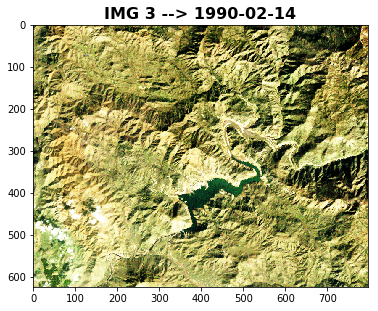

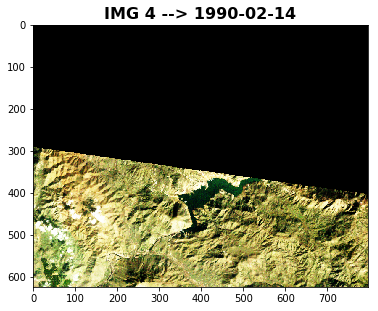

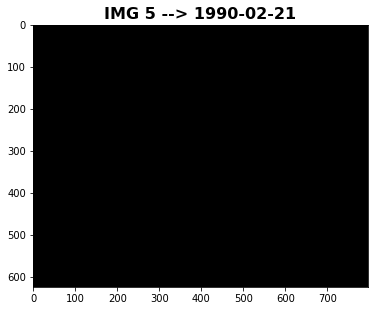

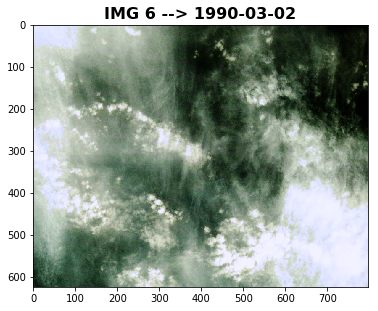

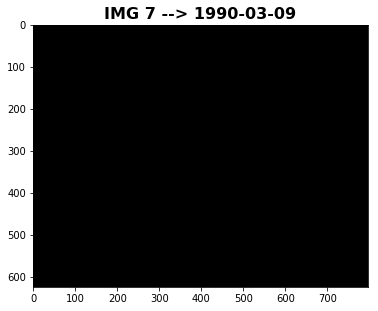

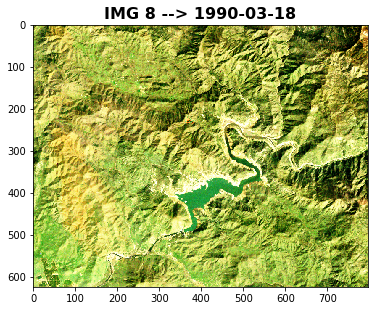

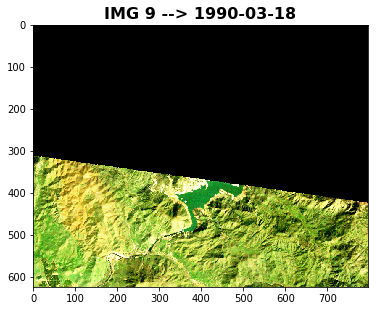

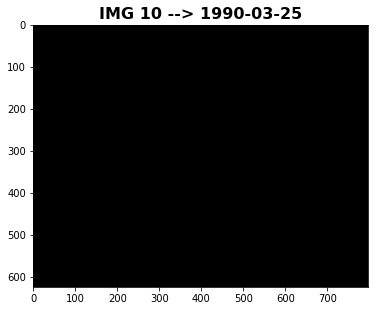

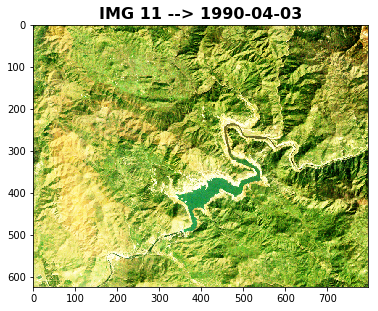

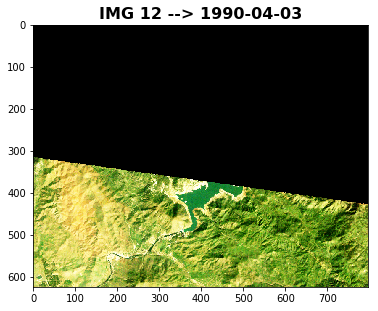

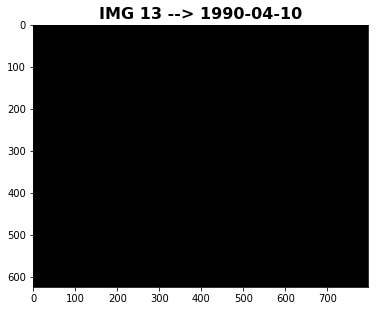

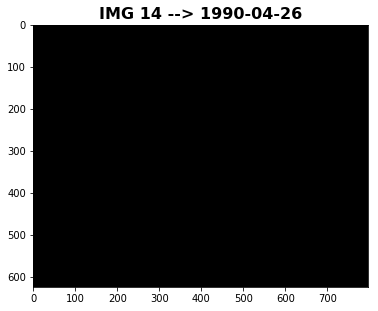

In [9]:
from noteLib import *
%matplotlib inline
for t in range(3,15):
    cnt=t
    figsize=[6,6]
    plot_labeled_rgb(ds, t, cnt, figsize=figsize)

In [14]:
! aws s3 ls s3://lsaa-test-cog/L05/1990/042/035/LT05_L2SP_042035_19900214_20170304_01_A1/

! aws s3 cp s3://lsaa-test-cog/L05/1990/042/035/LT05_L2SP_042035_19900214_20170304_01_A1/LT05_L2SP_042035_19900214_20170304_01_A1_thumbnail.png /data


2018-09-10 04:47:12   39790424 LT05_L2SP_042035_19900214_20170304_01_A1_fullimage.png
2018-09-10 04:47:12      34433 LT05_L2SP_042035_19900214_20170304_01_A1_thumbnail.png
download: s3://lsaa-test-cog/L05/1990/042/035/LT05_L2SP_042035_19900214_20170304_01_A1/LT05_L2SP_042035_19900214_20170304_01_A1_thumbnail.png to ../../../../data/LT05_L2SP_042035_19900214_20170304_01_A1_thumbnail.png


In [11]:
ds.x[3].values

array(817065.)

In [17]:
x = x_lon_extent
y = y_lat_extent 

In [19]:
from noteLib import *

In [20]:
m = display_map(y,x)

In [21]:
m